In [ ]:
# Question 1 

getwd()


[1] "C:/Users/damsara/Desktop"

In [ ]:
setwd("C:/Users/damsara/Desktop")

In [ ]:
set.seed(22000275)

In [ ]:
library(dplyr)
library(ggplot2)

In [ ]:
# I
employee_ids <- paste0("E", 1001:1050)

In [ ]:
# II
gender <- sample(c("Male", "Female"), 50, replace = TRUE, prob = c(6, 2))

In [ ]:
# III
age <- sample(25:40, 50, replace = TRUE)

In [ ]:
# IV
job_positions <- sample(c("Software Engineer", "Data Analyst", "System Administrator", "Project Manager"), 50, replace = TRUE)

In [ ]:
# V
salary <- sample(seq(100000, 200000, by = 5000), 50, replace = TRUE)

In [ ]:
# VI
departments <- sample(c("IT", "Finance", "HR", "Marketing"), 50, replace = TRUE)

In [ ]:
# VII
bonus <- sample(seq(5000, 20000, by = 1000), 50, replace = TRUE)


In [ ]:
# VIII
years_of_experience <- sample(1:15, 50, replace = TRUE)

In [ ]:
# IX
performance_rating <- sample(1:5, 50, replace = TRUE)

In [ ]:
# X
remote_eligibility <- sample(c("Eligible", "Not Eligible"), 50, replace = TRUE, prob = c(0.6, 0.4))

In [ ]:
employee_data <- data.frame(
  EmployeeID = employee_ids,
  Gender = gender,
  Age = age,
  JobPosition = job_positions,
  Salary = salary,
  Department = departments,
  Bonus = bonus,
  YearsOfExperience = years_of_experience,
  PerformanceRating = performance_rating,
  RemoteEligibility = remote_eligibility
)

In [ ]:
# a
str(employee_data)

'data.frame':	50 obs. of  10 variables:
 $ EmployeeID       : chr  "E1001" "E1002" "E1003" "E1004" ...
 $ Gender           : chr  "Female" "Male" "Female" "Male" ...
 $ Age              : int  34 33 31 37 36 33 32 37 35 31 ...
 $ JobPosition      : chr  "System Administrator" "Project Manager" "System Administrator" "System Administrator" ...
 $ Salary           : num  125000 105000 120000 200000 170000 160000 130000 150000 135000 130000 ...
 $ Department       : chr  "IT" "Finance" "HR" "Marketing" ...
 $ Bonus            : num  13000 17000 14000 16000 10000 10000 19000 19000 17000 14000 ...
 $ YearsOfExperience: int  1 8 14 15 4 11 9 7 15 2 ...
 $ PerformanceRating: int  3 2 2 2 3 3 5 3 4 1 ...
 $ RemoteEligibility: chr  "Eligible" "Not Eligible" "Eligible" "Eligible" ...


In [ ]:
# b
summary(employee_data[, c("Age", "Salary", "Bonus", "YearsOfExperience", "PerformanceRating")])

      Age            Salary           Bonus       YearsOfExperience
 Min.   :25.00   Min.   :100000   Min.   : 5000   Min.   : 1.00    
 1st Qu.:29.25   1st Qu.:121250   1st Qu.:10000   1st Qu.: 5.25    
 Median :33.00   Median :145000   Median :13000   Median : 8.00    
 Mean   :32.60   Mean   :150500   Mean   :12860   Mean   : 8.30    
 3rd Qu.:35.75   3rd Qu.:183750   3rd Qu.:16750   3rd Qu.:12.00    
 Max.   :40.00   Max.   :200000   Max.   :20000   Max.   :15.00    
 PerformanceRating
 Min.   :1.00     
 1st Qu.:2.00     
 Median :3.00     
 Mean   :3.14     
 3rd Qu.:4.00     
 Max.   :5.00     

In [ ]:
# c
employee_data$TotalCompensation <- employee_data$Salary + employee_data$Bonus

In [ ]:
# d
employee_data$EmployeeID <- as.factor(employee_data$EmployeeID)

In [ ]:
# e
it_remote_employees <- employee_data %>% filter(Department == "IT" & RemoteEligibility == "Eligible")

In [ ]:
# f
high_performers <- employee_data %>% filter(PerformanceRating >= 4)

In [ ]:
# g
avg_salary_by_dept <- employee_data %>% group_by(Department) %>% summarise(AvgSalary = mean(Salary))

In [ ]:
# h
gender_proportion <- employee_data %>% group_by(Gender) %>% summarise(Proportion = n() / nrow(employee_data))

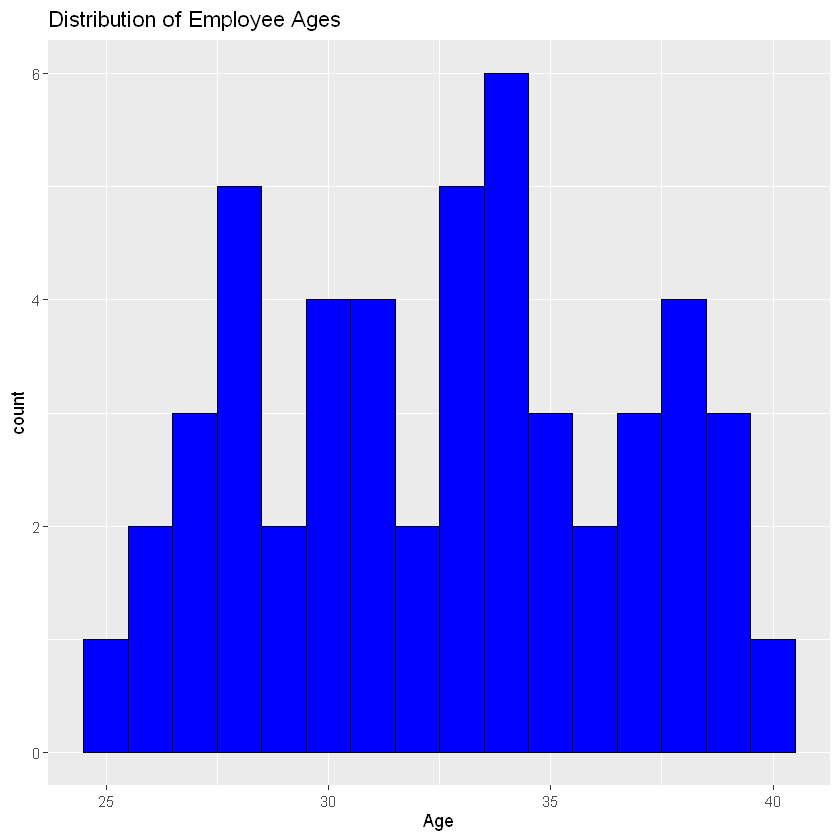

In [ ]:
# i
ggplot(employee_data, aes(x = Age)) + geom_histogram(binwidth = 1, fill = "blue", color = "black") + labs(title = "Distribution of Employee Ages")

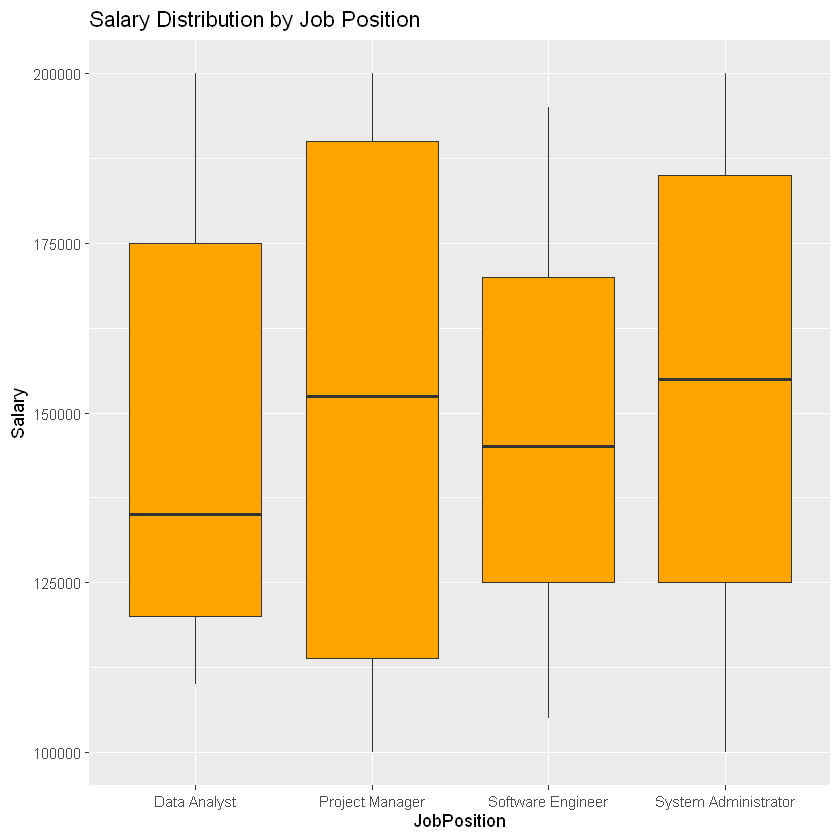

In [107]:
# j
ggplot(employee_data, aes(x = JobPosition, y = Salary)) + geom_boxplot(fill = "orange") + labs(title = "Salary Distribution by Job Position")

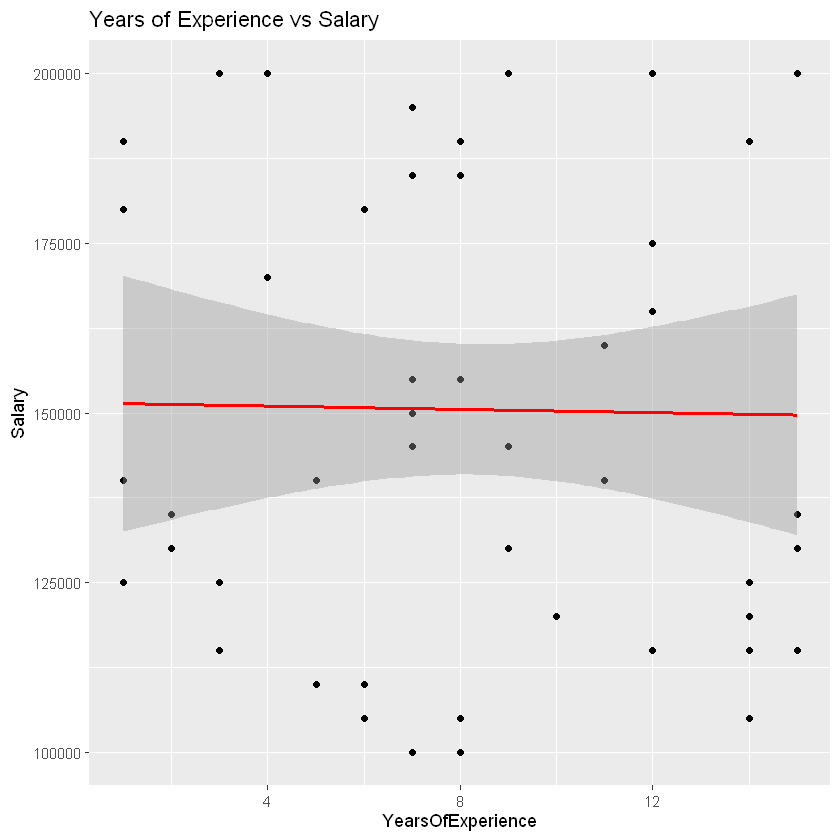

In [108]:
ggplot(employee_data, aes(x = YearsOfExperience, y = Salary)) + geom_point() +  geom_smooth(method = "lm", color = "red", formula = y ~ x) +  labs(title = "Years of Experience vs Salary")

In [109]:
# l
avg_bonus_rating_by_position <- employee_data %>% group_by(JobPosition) %>% summarise(AvgBonus = mean(Bonus), AvgRating = mean(PerformanceRating))

In [110]:
# m
avg_experience_by_gender <- employee_data %>% group_by(Gender) %>% summarise(AvgYearsOfExperience = mean(YearsOfExperience))


In [111]:
# n
finance_salary <- employee_data %>% filter(Department == "Finance") %>% pull(Salary)
finance_ci <- t.test(finance_salary, conf.level = 0.95)$conf.int
finance_ci

[1] 117881.0 159452.4
attr(,"conf.level")
[1] 0.95

In [112]:
# o
department_stats <- function(dept_name) {
  dept_data <- employee_data %>% filter(Department == dept_name)
  list(
    NumEmployees = nrow(dept_data),
    AvgSalary = mean(dept_data$Salary),
    AvgPerformanceRating = mean(dept_data$PerformanceRating)
  )
}

hr_stats <- department_stats("HR")
hr_stats

$NumEmployees
[1] 15

$AvgSalary
[1] 151333.3

$AvgPerformanceRating
[1] 3.2

In [113]:
# p
correlation <- cor(employee_data$YearsOfExperience, employee_data$Salary)
correlation

[1] -0.01564975

In [114]:
# q
salary_model <- lm(Salary ~ YearsOfExperience, data = employee_data)
summary(salary_model)


Call:
lm(formula = Salary ~ YearsOfExperience, data = employee_data)

Residuals:
   Min     1Q Median     3Q    Max 
-50656 -28956  -5536  33064  50303 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       151494.9    10349.9  14.637   <2e-16 ***
YearsOfExperience   -119.9     1105.4  -0.108    0.914    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33870 on 48 degrees of freedom
Multiple R-squared:  0.0002449,	Adjusted R-squared:  -0.02058 
F-statistic: 0.01176 on 1 and 48 DF,  p-value: 0.9141


In [115]:
# r
write.csv(employee_data, "employee_data.csv", row.names = FALSE)

In [116]:
# Question 2

getwd()

[1] "C:/Users/damsara/Desktop"

In [117]:
# a
library(carData)
data("Davis")

In [118]:
# b
summary(Davis)

 sex         weight          height          repwt            repht      
 F:112   Min.   : 39.0   Min.   : 57.0   Min.   : 41.00   Min.   :148.0  
 M: 88   1st Qu.: 55.0   1st Qu.:164.0   1st Qu.: 55.00   1st Qu.:160.5  
         Median : 63.0   Median :169.5   Median : 63.00   Median :168.0  
         Mean   : 65.8   Mean   :170.0   Mean   : 65.62   Mean   :168.5  
         3rd Qu.: 74.0   3rd Qu.:177.2   3rd Qu.: 73.50   3rd Qu.:175.0  
         Max.   :166.0   Max.   :197.0   Max.   :124.00   Max.   :200.0  
                                         NA's   :17       NA's   :17     

In [119]:
# c
male_proportion <- sum(Davis$sex == "M") / nrow(Davis)
male_proportion

[1] 0.44

In [120]:
# d
males <- subset(Davis, sex == "M")
females <- subset(Davis, sex == "F")

In [121]:
# e

# male
male_height_mean <- mean(males$height, na.rm = TRUE)
male_height_var <- var(males$height, na.rm = TRUE)
male_height_sd <- sd(males$height, na.rm = TRUE)

# female
female_height_mean <- mean(females$height, na.rm = TRUE)
female_height_var <- var(females$height, na.rm = TRUE)
female_height_sd <- sd(females$height, na.rm = TRUE)

# Display result
list(
  Male_Height = c(Mean = male_height_mean, Variance = male_height_var, SD = male_height_sd),
  Female_Height = c(Mean = female_height_mean, Variance = female_height_var, SD = female_height_sd)
)

$Male_Height
      Mean   Variance         SD 
178.011364  41.482628   6.440701 

$Female_Height
     Mean  Variance        SD 
163.74107 135.58100  11.64393

In [122]:
# f 
n1 <- nrow(males)
n2 <- nrow(females)
s1 <- male_height_sd
s2 <- female_height_sd

pooled_sd <- sqrt(((n1 - 1) * s1^2 + (n2 - 1) * s2^2) / (n1 + n2 - 2))
pooled_sd

[1] 9.707458

In [123]:
# g
point_estimate <- male_height_mean - female_height_mean
point_estimate

[1] 14.27029

In [124]:
# h
t_critical <- qt(0.975, df = n1 + n2 - 2)  # t-score for 95% confidence level
se <- pooled_sd * sqrt(1/n1 + 1/n2)
ci_diff <- c(point_estimate - t_critical * se, point_estimate + t_critical * se)
ci_diff

[1] 11.54332 16.99727